CLAHE (Contrast Limited Adaptive Histogram Equalization) for improving contrast.CLAHE function is designed for the Grayscale ,But we can seperate eacch channel to LAB and apply for RGB aswell.

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Image CLAHE')

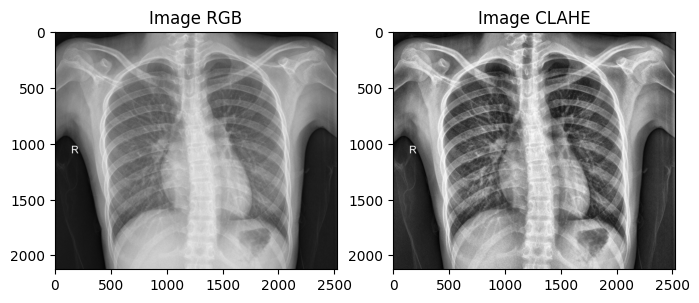

In [3]:
image = cv2.imread("./data/IM-0028-0001.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
CLAHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
grey = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
ch1 = CLAHE.apply(grey)

cv2.imwrite("./data/IM-0028-0001_clahe.jpeg", ch1)
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Image RGB")

plt.subplot(1,2,2)
plt.imshow(ch1, cmap="gray")
plt.title("Image CLAHE")

To Apply CLAHE on RGB images we will use LAB Colour space.LAB Color space is a color model designed to approx often used for image processing tasks like color correction and contrast adjustment.
L Channel : Lightness,
A Channel : Green - Red,
B Channel : Blue - Yellow

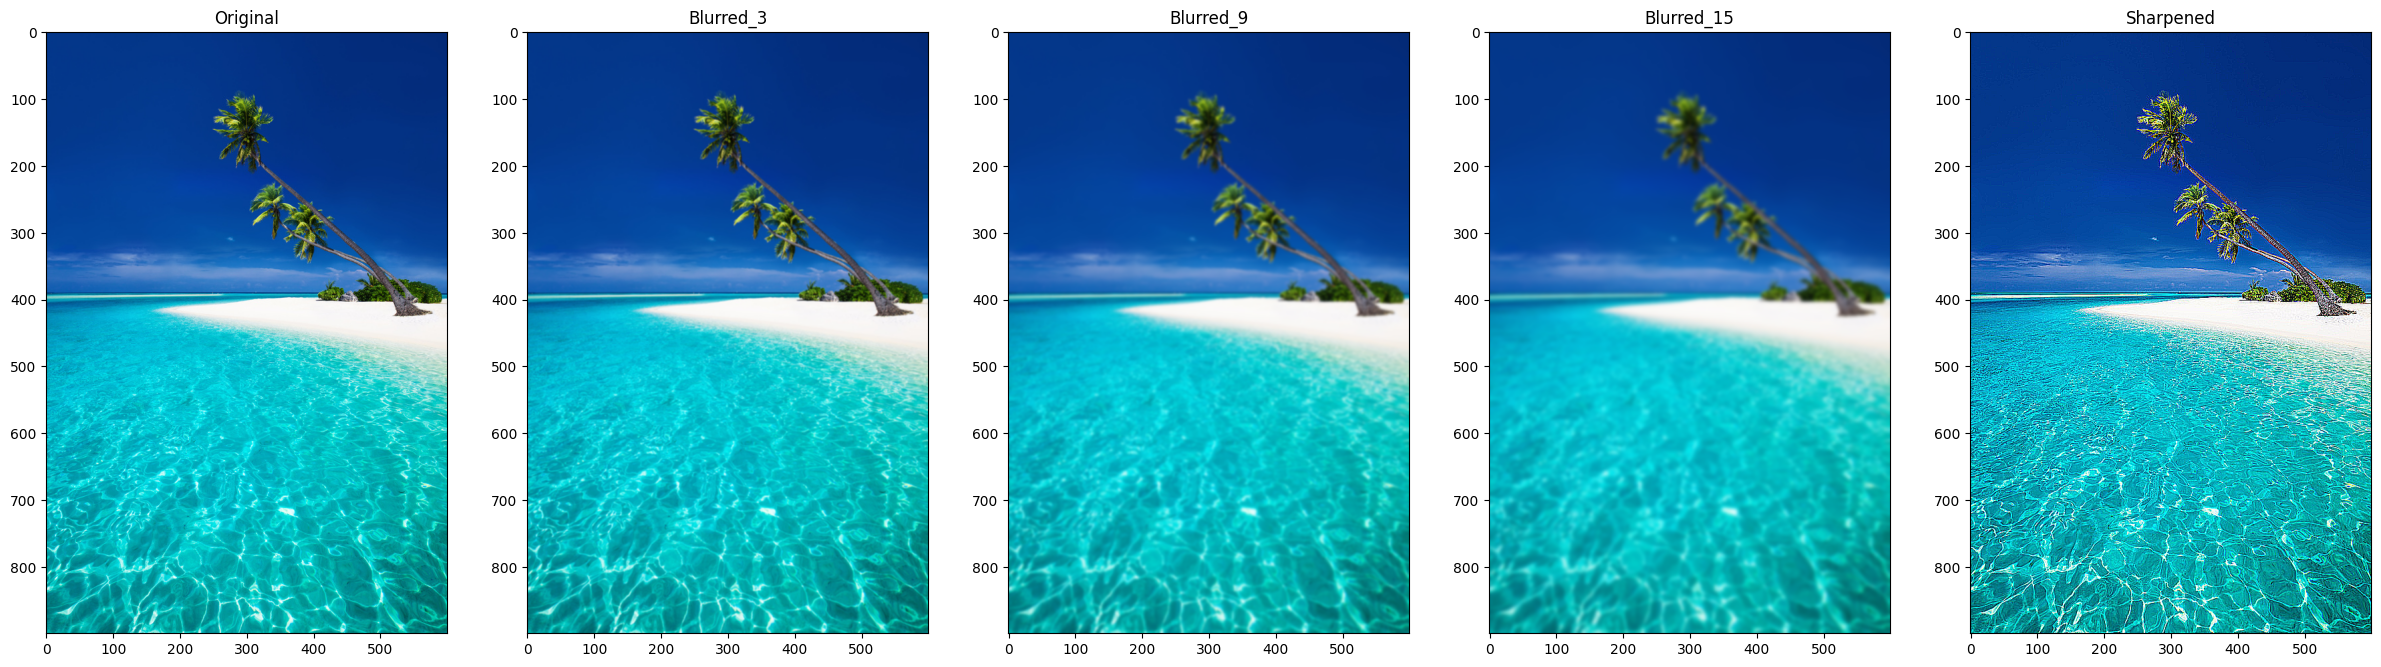

In [9]:
# Load the image
image = cv2.imread('./data/beach-blue.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernelSizes = [(3, 3), (9, 9), (15, 15)]


# Blurring the Image
blurred_3 = cv2.GaussianBlur(image_rgb, kernelSizes[0], 0)
blurred_9 = cv2.GaussianBlur(image_rgb, kernelSizes[1], 0)
blurred_15 = cv2.GaussianBlur(image_rgb, kernelSizes[2], 0)


# Sharpening the Image
# kernel_1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(image_rgb, -1, kernel_2)
# sharpened = cv2.filter2D(sharpened, -1, kernel_2)
# Display the results
plt.figure(figsize=(30, 15))


plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(blurred_3)
plt.title('Blurred_3')

plt.subplot(1, 5, 3)
plt.imshow(blurred_9)
plt.title('Blurred_9')

plt.subplot(1, 5, 4)
plt.imshow(blurred_15)
plt.title('Blurred_15')

plt.subplot(1, 5, 5)
plt.imshow(sharpened)
plt.title('Sharpened')

plt.show()

Text(0.5, 1.0, 'CLAHE Applied to RGB Image')

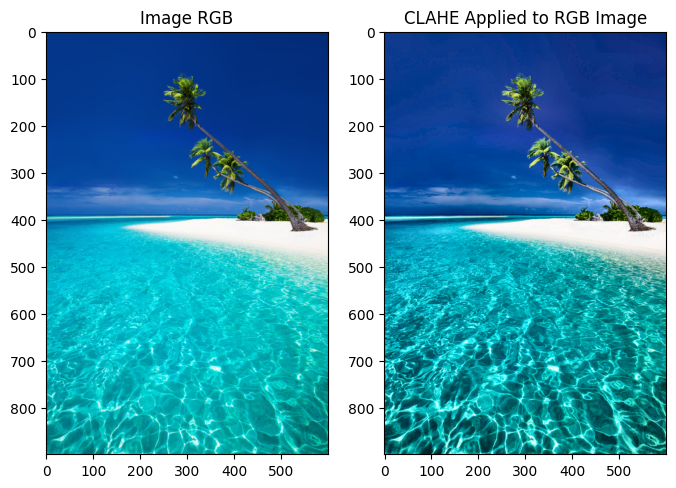

In [10]:
image = cv2.imread("./data/beach-blue.jpg")
# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l_channel, a_channel, b_channel = cv2.split(lab)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(l_channel)

# Merge the CLAHE enhanced L-channel with the original a and b channels
lab_clahe = cv2.merge((cl1, a_channel, b_channel))

# Convert LAB back to RGB for display
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(image_clahe)
plt.title("CLAHE Applied to RGB Image")